In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, StratifiedKFold, learning_curve, train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from mlxtend.plotting import plot_decision_regions



In [3]:
df = pd.read_csv('train.csv')
df.head().T

,0,1,2,3,4
id,0.0,1.0,2.0,3.0,4.0
age,55.0,30.0,45.0,55.0,45.0
height(cm),170.0,170.0,170.0,150.0,160.0
weight(kg),80.0,80.0,75.0,55.0,55.0
waist(cm),92.0,94.0,84.0,85.0,72.0
eyesight(left),1.2,1.5,1.0,0.9,0.5
eyesight(right),0.8,1.5,1.0,0.5,0.6
hearing(left),1.0,1.0,1.0,1.0,1.0
hearing(right),1.0,1.0,1.0,1.0,1.0
systolic,129.0,128.0,124.0,123.0,117.0


In [5]:
# Check for any missing values
missing_values = df.isnull().sum()

# Drop unnecessary columns (if any), e.g., 'id' might not be relevant for modeling
data_cleaned = df.drop(columns=['id'])

missing_values, data_cleaned.head()


(id                     0
 age                    0
 height(cm)             0
 weight(kg)             0
 waist(cm)              0
 eyesight(left)         0
 eyesight(right)        0
 hearing(left)          0
 hearing(right)         0
 systolic               0
 relaxation             0
 fasting blood sugar    0
 Cholesterol            0
 triglyceride           0
 HDL                    0
 LDL                    0
 hemoglobin             0
 Urine protein          0
 serum creatinine       0
 AST                    0
 ALT                    0
 Gtp                    0
 dental caries          0
 smoking                0
 dtype: int64,
     age  height(cm)  weight(kg)  waist(cm)  eyesight(left)  eyesight(right)  \
 0  55.0       170.0        80.0       92.0             1.2              0.8   
 1  30.0       170.0        80.0       94.0             1.5              1.5   
 2  45.0       170.0        75.0       84.0             1.0              1.0   
 3  55.0       150.0        55.0       85

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into features (X) and target (y)
X = data_cleaned.drop(columns=['smoking'])
y = data_cleaned['smoking']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy, report


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


(0.772,
 '              precision    recall  f1-score   support\n\n         0.0       0.81      0.84      0.82      1878\n         1.0       0.71      0.66      0.68      1122\n\n    accuracy                           0.77      3000\n   macro avg       0.76      0.75      0.75      3000\nweighted avg       0.77      0.77      0.77      3000\n')

In [7]:
# Perform 5-fold cross-validation on the logistic regression model
cv_scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation of the cross-validation scores
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

cv_mean, cv_std, cv_scores

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stab

(np.float64(0.7746),
 np.float64(0.007846867740272757),
 array([0.77833333, 0.76733333, 0.78833333, 0.77      , 0.769     ]))

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Initialize and train the decision tree classifier
tree_model = DecisionTreeClassifier(random_state=42, max_depth=7)
tree_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test)

# Evaluate the model's performance
tree_accuracy = accuracy_score(y_test, y_pred_tree)
tree_report = classification_report(y_test, y_pred_tree)

tree_accuracy, tree_report


(0.7746666666666666,
 '              precision    recall  f1-score   support\n\n         0.0       0.87      0.76      0.81      1878\n         1.0       0.66      0.80      0.73      1122\n\n    accuracy                           0.77      3000\n   macro avg       0.77      0.78      0.77      3000\nweighted avg       0.79      0.77      0.78      3000\n')

In [41]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd

# Load your dataset (replace with your actual file path)
data = pd.read_csv('train.csv')

# Drop unnecessary columns
data_cleaned = data.drop(columns=['id'])

# Split the data into features (X) and target (y)
X = data_cleaned.drop(columns=['smoking'])
y = data_cleaned['smoking']

skf = StratifiedKFold(5)
# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the results
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"ROC AUC Score: {roc_auc}")


Accuracy: 0.7986666666666666
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1893
         1.0       0.71      0.77      0.74      1107

    accuracy                           0.80      3000
   macro avg       0.78      0.79      0.79      3000
weighted avg       0.80      0.80      0.80      3000

ROC AUC Score: 0.880813447155426


In [46]:
test_data = pd.read_csv('test.csv')
# O'rganish uchun ishlatilgan barcha ustunlar nomini olish va ro'yxatga aylantirish
train_columns = list(X_train.columns)

# Test to'plamidan faqat o'rgatilgan ustunlarni tanlash
test_data_prepared = test_data[train_columns]  # Faqat modelda ishlatilgan ustunlarni tanlaymiz

# Test ma'lumotlar to'plamidagi smoking qiymatlarini bashorat qilish
test_predictions = rf_model.predict(test_data_prepared)

# Test natijalarini yangi DataFrame ga yig'ish
submission = pd.DataFrame({
    'id': test_data['id'],   # test datasidagi ID ustuni
    'smoking': test_predictions   # bashorat qilingan smoking qiymatlari
})

# Yangi CSV faylga natijalarni saqlash
submission.to_csv('s.csv', index=False)

print("Bashoratlar 'smoking_predictions.csv' fayliga muvaffaqiyatli saqlandi.")

Bashoratlar 'smoking_predictions.csv' fayliga muvaffaqiyatli saqlandi.


In [20]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd

# Load your dataset (replace with your actual file path)
data = pd.read_csv('train.csv')

# Drop unnecessary columns
data_cleaned = data.drop(columns=['id'])

# Split the data into features (X) and target (y)
X = data_cleaned.drop(columns=['smoking'])
y = data_cleaned['smoking']

# Split the dataset into training and testing sets (80% train, 20% test), with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42, max_depth=18)

# Cross-validation setup with StratifiedKFold
skf = StratifiedKFold(n_splits=5)

# Perform cross-validation and get accuracy scores
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=skf, scoring='accuracy')

# Train the model on the entire training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the results
print(f"Cross-Validation Accuracy Scores: {cv_scores}")
print(f"Mean CV Accuracy: {cv_scores.mean()}")
print(f"Test Set Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"ROC AUC Score: {roc_auc}")


Cross-Validation Accuracy Scores: [0.80791667 0.78791667 0.78375    0.81208333 0.7875    ]
Mean CV Accuracy: 0.7958333333333333
Test Set Accuracy: 0.801
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1893
         1.0       0.71      0.78      0.74      1107

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.79      3000
weighted avg       0.81      0.80      0.80      3000

ROC AUC Score: 0.8849455346111833


In [21]:
from sklearn.model_selection import GridSearchCV

# Define a parameter grid
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='roc_auc', n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and performance
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best parameters: {'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500}
Best ROC AUC Score: 0.8850312061094197


In [22]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd

# Load your dataset (replace with your actual file path)
data = pd.read_csv('train.csv')

# Drop unnecessary columns
data_cleaned = data.drop(columns=['id'])

# Split the data into features (X) and target (y)
X = data_cleaned.drop(columns=['smoking'])
y = data_cleaned['smoking']

# Split the dataset into training and testing sets (80% train, 20% test), with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Initialize the Random Forest classifier with the best parameters
rf_model_optimized = RandomForestClassifier(
    n_estimators=500,
    max_depth=20,
    max_features='sqrt',
    min_samples_split=10,
    min_samples_leaf=4,
    random_state=42
)

# Train the optimized model on the entire training set
rf_model_optimized.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model_optimized.predict(X_test)
y_pred_prob = rf_model_optimized.predict_proba(X_test)[:, 1]  # Get the probabilities for the positive class

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred_rf)
report = classification_report(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob)

# Print the results
print(f"Test Set Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"ROC AUC Score: {roc_auc}")


Test Set Accuracy: 0.8026666666666666
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1893
         1.0       0.71      0.79      0.75      1107

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.79      3000
weighted avg       0.81      0.80      0.80      3000

ROC AUC Score: 0.8870779093422206


In [24]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold, cross_val_score

# SMOTE orqali ma'lumotlarni tenglashtirish
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# 5-fold Stratified kross-valikatsiya orqali ROC-AUCni baholash
cv = StratifiedKFold(n_splits=5)

# Random Forest modelida kross-valikatsiyani amalga oshirish
cv_scores = cross_val_score(rf_model_optimized, X_resampled, y_resampled, cv=cv, scoring='roc_auc')

print(f"Cross-Validation ROC AUC Scores: {cv_scores}")
print(f"Mean ROC AUC Score: {cv_scores.mean()}")


Cross-Validation ROC AUC Scores: [0.89643381 0.89596832 0.89232814 0.9691296  0.96200238]
Mean ROC AUC Score: 0.9231724512214488


In [25]:
# Test datasetni yuklash
test_data = pd.read_csv('test.csv')

# Test datasettan 'id' ustunini saqlab olish, chunki uni keyin qayta ishlatamiz
test_ids = test_data['id']

# Test datasettan maqsad bo'lmagan ustunni olib tashlash ('id'ni chiqarib tashlash)
X_test_final = test_data.drop(columns=['id'])

# Train modelini ishlatib test dataset uchun bashoratlarni amalga oshirish
smoking_predictions = rf_model_optimized.predict(X_test_final)

# Bashorat natijalarini DataFrame formatiga o'tkazish
predictions_df = pd.DataFrame({
    'id': test_ids,
    'smoking': smoking_predictions
})

# Yangi faylga saqlash
predictions_df.to_csv('smoking_predictions1.csv', index=False)

print("Bashoratlar smoking_predictions.csv fayliga saqlandi.")


Bashoratlar smoking_predictions.csv fayliga saqlandi.


In [26]:
# Zarur kutubxonalarni import qilish
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd
from imblearn.over_sampling import SMOTE

# Datasetni yuklash
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Ma'lumotlarni tozalash va tayyorlash
train_data_cleaned = train_data.drop(columns=['id'])
X = train_data_cleaned.drop(columns=['smoking'])
y = train_data_cleaned['smoking']

# O'quv va test ma'lumotlariga bo'lish (80% o'quv, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE yordamida o'quv ma'lumotlarini tenglashtirish
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Random Forest modelini tanlangan eng yaxshi parametrlar bilan qurish va tenglashtirish
rf_model_optimized = RandomForestClassifier(
    n_estimators=500,
    max_depth=15,  # Overfittingni kamaytirish uchun chuqurlikni qisqartirdik
    max_features='sqrt',
    min_samples_split=20,  # Oddiylashtirish uchun ko'proq namunalarga ajratamiz
    min_samples_leaf=5,  # Har bir bargdagi minimal namuna sonini oshirdik
    random_state=42,
    class_weight='balanced'  # Nomutanosib sinflarni tenglashtirish
)

# Modelni o'quv ma'lumotlari bilan o'rgatish
rf_model_optimized.fit(X_train_resampled, y_train_resampled)

# Test ma'lumotlari bo'yicha bashoratlar qilish
y_pred_rf = rf_model_optimized.predict(X_test)
y_pred_prob = rf_model_optimized.predict_proba(X_test)[:, 1]

# Modelni baholash
accuracy = accuracy_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_prob)
report = classification_report(y_test, y_pred_rf)

# Natijalarni chop etish
print(f"Test Set Accuracy: {accuracy}")
print(f"Classification Report:\n{report}")
print(f"ROC AUC Score: {roc_auc}")

# Test datasetida 'smoking' ni bashorat qilish
test_ids = test_data['id']
X_test_final = test_data.drop(columns=['id'])

smoking_predictions = rf_model_optimized.predict(X_test_final)

# Yangi CSV faylga bashoratlarni saqlash
predictions_df = pd.DataFrame({
    'id': test_ids,
    'smoking': smoking_predictions
})

predictions_df.to_csv('smoking_predictions2.csv', index=False)
print("Bashoratlar smoking_predictions.csv fayliga saqlandi.")


Test Set Accuracy: 0.7946666666666666
Classification Report:
              precision    recall  f1-score   support

         0.0       0.91      0.75      0.82      1893
         1.0       0.67      0.87      0.76      1107

    accuracy                           0.79      3000
   macro avg       0.79      0.81      0.79      3000
weighted avg       0.82      0.79      0.80      3000

ROC AUC Score: 0.885801395432514
Bashoratlar smoking_predictions.csv fayliga saqlandi.


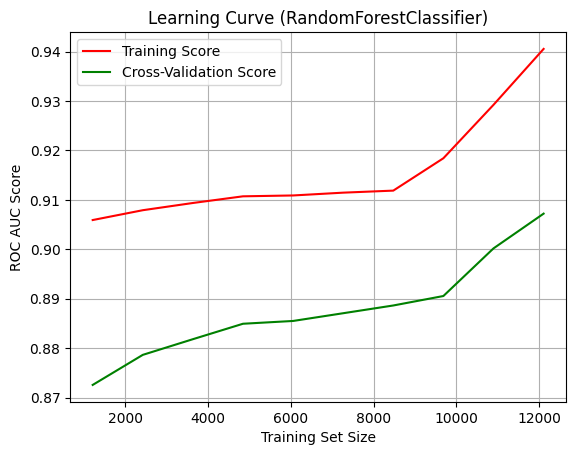

In [30]:
# Zarur kutubxonalarni import qilish
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve, StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

# Datasetni yuklash
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Ma'lumotlarni tozalash va tayyorlash
train_data_cleaned = train_data.drop(columns=['id'])
X = train_data_cleaned.drop(columns=['smoking'])
y = train_data_cleaned['smoking']

# O'quv va test ma'lumotlariga bo'lish (80% o'quv, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# SMOTE yordamida o'quv ma'lumotlarini tenglashtirish
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Random Forest modelini tanlangan eng yaxshi parametrlar bilan qurish va tenglashtirish
rf_model_optimized = RandomForestClassifier(
    n_estimators=500,
    max_depth=18,  # Overfittingni kamaytirish uchun chuqurlikni qisqartirdik
    max_features='sqrt',
    min_samples_split=35,  # Oddiylashtirish uchun ko'proq namunalarga ajratamiz
    min_samples_leaf=30,  # Har bir bargdagi minimal namuna sonini oshirdik
    random_state=42,
    class_weight='balanced'  # Nomutanosib sinflarni tenglashtirish
)

# Kross-valikatsiya uchun StratifiedKFold
cv = StratifiedKFold(n_splits=5)

# Learning Curve yaratish
train_sizes, train_scores, test_scores = learning_curve(
    estimator=rf_model_optimized, 
    X=X_train_resampled, 
    y=y_train_resampled, 
    cv=cv, 
    scoring='roc_auc', 
    n_jobs=-1, 
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# O'quv va test natijalarining o'rtacha qiymatlarini hisoblash
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

# Learning curve diagrammasini chizish
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training Score', color='r')
plt.plot(train_sizes, test_scores_mean, label='Cross-Validation Score', color='g')

# Diagrammaga kerakli belgilashlar qo'shish
plt.title('Learning Curve (RandomForestClassifier)')
plt.xlabel('Training Set Size')
plt.ylabel('ROC AUC Score')
plt.legend(loc='best')
plt.grid()
plt.show()


In [36]:
# O'quv modelini o'rgatish
rf_model_optimized.fit(X_train_resampled, y_train_resampled)

# Test ma'lumotlariga bashoratlar kiritish uchun faqat kerakli xususiyatlarni tanlaymiz
X_test_data = test_data.drop(columns=['id'])  # Test ma'lumotlaridan 'id' ustunini olib tashlaymiz

# Test to'plamida bashorat qilish
test_predictions = rf_model_optimized.predict(X_test_data)

# Bashoratlarni test_data ga qo'shish
test_data['smoking_pred'] = test_predictions

# Bashorat natijalarini yangi CSV faylga saqlash
test_data[['id', 'smoking_pred']].to_csv('submission.csv', index=False)

print("Natijalar submission.csv fayliga saqlandi.")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- smoking_pred


In [37]:
# O'quv ma'lumotlarida ishlatilgan ustunlarni olish
train_columns = X.columns  # O'quv to'plamidagi xususiyatlar ustunlari (smoking dan tashqari)

# Test ma'lumotlarini moslashtirish (id ustunini olib tashlab, o'quv to'plamidagi xususiyatlar bilan moslashtirish)
X_test_data = test_data.drop(columns=['id'])  # Test ma'lumotlarida smoking yo'q, shuning uchun bu ustunni qoldiramiz

# Test ma'lumotlarini o'quv to'plamidagi xususiyatlar bilan moslashtirish (ustunlarni tekshirish)
X_test_data = X_test_data[train_columns]

# Test to'plamida bashorat qilish
test_predictions = rf_model_optimized.predict(X_test_data)

# Bashoratlarni test_data ga qo'shish
test_data['smoking_pred'] = test_predictions

# Bashorat natijalarini yangi CSV faylga saqlash
test_data[['id', 'smoking_pred']].to_csv('submission.csv', index=False)

print("Natijalar submission.csv fayliga saqlandi.")


Natijalar submission.csv fayliga saqlandi.


Accuracy: 0.7786666666666666
ROC AUC: 0.867957910243195
Classification Report:
              precision    recall  f1-score   support

         0.0       0.82      0.83      0.82      1878
         1.0       0.71      0.70      0.70      1122

    accuracy                           0.78      3000
   macro avg       0.76      0.76      0.76      3000
weighted avg       0.78      0.78      0.78      3000



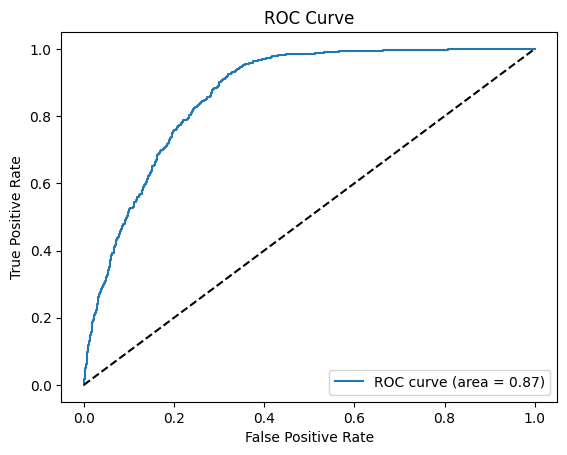

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the test dataset (where 'smoking' is not available)
test_data = pd.read_csv('test.csv')

# Feature Engineering for both train and test datasets
for dataset in [train_data, test_data]:
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']

# Prepare the train data
X = train_data.drop(columns=['id', 'smoking'])  # Dropping ID and target column from features
y = train_data['smoking']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with StandardScaler and LogisticRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardizing the data
    ('model', LogisticRegression())  # Logistic Regression Model
])

# Training the model
pipeline.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = pipeline.predict(X_val)
y_val_proba = pipeline.predict_proba(X_val)[:, 1]  # Get probability scores for ROC AUC

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)
report = classification_report(y_val, y_val_pred)

# Display the accuracy, ROC AUC, and classification report
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Predicting the 'smoking' status for the test dataset
test_features = test_data.drop(columns=['id'])  # Drop the 'id' column from test data
test_predictions = pipeline.predict(test_features)

# Save predictions to a CSV file
test_data['smoking'] = test_predictions
test_data[['id', 'smoking']].to_csv('test_predictions.csv', index=False)


Accuracy: 0.8016666666666666
ROC AUC: 0.8840813699862751
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1878
         1.0       0.72      0.77      0.74      1122

    accuracy                           0.80      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.80      0.80      0.80      3000



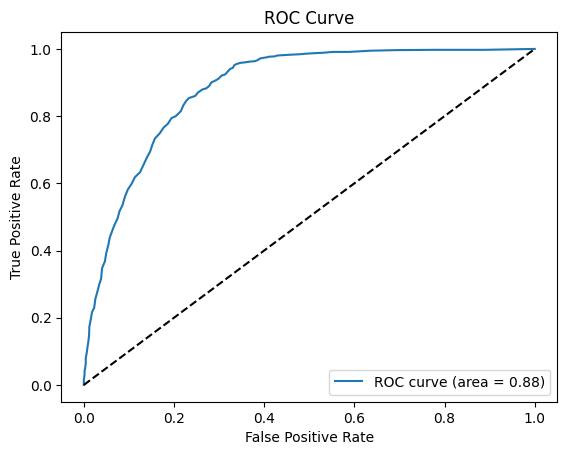

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the test dataset (where 'smoking' is not available)
test_data = pd.read_csv('test.csv')

# Feature Engineering for both train and test datasets
for dataset in [train_data, test_data]:
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']

# Prepare the train data
X = train_data.drop(columns=['id', 'smoking'])  # Dropping ID and target column from features
y = train_data['smoking']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating a pipeline with StandardScaler and RandomForestClassifier
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Standardizing the data
    ('model', RandomForestClassifier(random_state=42))  # Random Forest Model
])

# Training the model
pipeline.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = pipeline.predict(X_val)
y_val_proba = pipeline.predict_proba(X_val)[:, 1]  # Get probability scores for ROC AUC

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)
report = classification_report(y_val, y_val_pred)

# Display the accuracy, ROC AUC, and classification report
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Predicting the 'smoking' status for the test dataset
test_features = test_data.drop(columns=['id'])  # Drop the 'id' column from test data
test_predictions = pipeline.predict(test_features)

# Save predictions to a CSV file
test_data['smoking'] = test_predictions
test_data[['id', 'smoking']].to_csv('test_predictions_rf.csv', index=False)


Fitting 5 folds for each of 50 candidates, totalling 250 fits


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
135 fits failed out of a total of 250.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py",

Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 30, 'criterion': 'entropy', 'bootstrap': True}
Accuracy: 0.8
ROC AUC: 0.8881675237623367
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84      1878
         1.0       0.71      0.78      0.74      1122

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.79      3000
weighted avg       0.80      0.80      0.80      3000



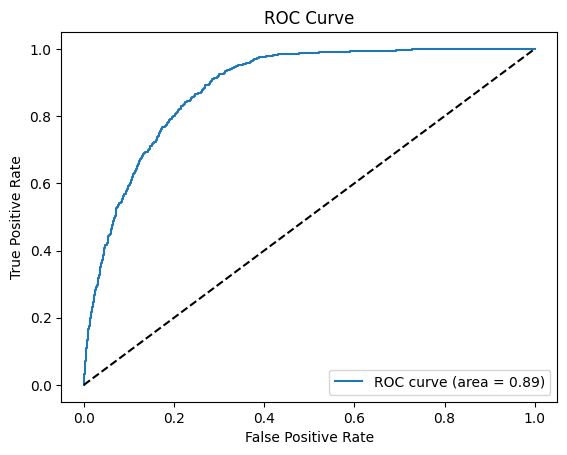

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the test dataset (where 'smoking' is not available)
test_data = pd.read_csv('test.csv')

# Feature Engineering for both train and test datasets
for dataset in [train_data, test_data]:
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']

# Prepare the train data
X = train_data.drop(columns=['id', 'smoking'])  # Dropping ID and target column from features
y = train_data['smoking']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],  # Number of trees
    'max_depth': [10, 20, 30, None],        # Maximum depth of each tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required at each leaf
    'bootstrap': [True, False],             # Whether bootstrap samples are used
    'max_features': ['auto', 'sqrt'],       # Number of features to consider at each split
    'criterion': ['gini', 'entropy']        # Split criterion
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring='roc_auc',  # Optimize based on ROC AUC
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters from the random search
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model on the validation set
best_model = random_search.best_estimator_
y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)
report = classification_report(y_val, y_val_pred)

# Display the accuracy, ROC AUC, and classification report
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Predicting the 'smoking' status for the test dataset
test_features = test_data.drop(columns=['id'])  # Drop the 'id' column from test data
test_predictions = best_model.predict(test_features)

# Save predictions to a CSV file
test_data['smoking'] = test_predictions
test_data[['id', 'smoking']].to_csv('test_predictions_rf_tuned.csv', index=False)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\ma\core.py:2846: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 20, 'criterion': 'gini', 'bootstrap': True}
Accuracy: 0.8013333333333333
ROC AUC: 0.8883611533489376
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1878
         1.0       0.72      0.77      0.74      1122

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.79      3000
weighted avg       0.81      0.80      0.80      3000



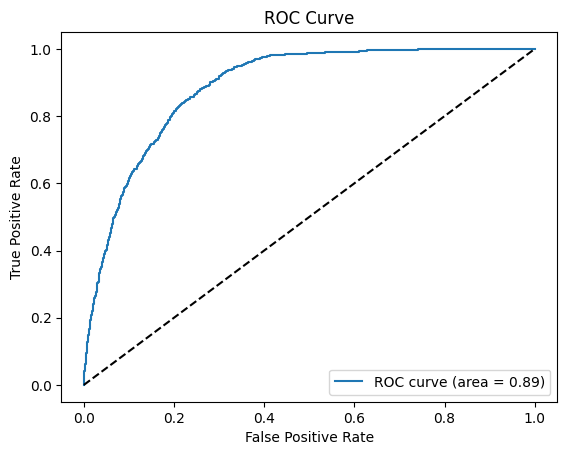

In [41]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the test dataset (where 'smoking' is not available)
test_data = pd.read_csv('test.csv')

# Feature Engineering for both train and test datasets
for dataset in [train_data, test_data]:
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']

# Prepare the train data
X = train_data.drop(columns=['id', 'smoking'])  # Dropping ID and target column from features
y = train_data['smoking']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV with overfitting control
param_dist = {
    'n_estimators': [500, 1000],             # Reduce n_estimators to prevent overfitting
    'max_depth': [10, 20, 30],               # Limit the depth of the trees
    'min_samples_split': [10, 20],           # Increase to prevent small splits
    'min_samples_leaf': [2, 4],              # Increase leaf size to control overfitting
    'bootstrap': [True],                     # Use bootstrapping to control variance
    'max_features': ['sqrt'],                # Consider fewer features to prevent overfitting
    'criterion': ['gini']                    # 'gini' can sometimes help with generalization
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Reduced iterations to focus on critical hyperparameters
    scoring='roc_auc',  # Optimize based on ROC AUC
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters from the random search
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model on the validation set
best_model = random_search.best_estimator_
y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)
report = classification_report(y_val, y_val_pred)

# Display the accuracy, ROC AUC, and classification report
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Predicting the 'smoking' status for the test dataset
test_features = test_data.drop(columns=['id'])  # Drop the 'id' column from test data
test_predictions = best_model.predict(test_features)

# Save predictions to a CSV file
test_data['smoking'] = test_predictions
test_data[['id', 'smoking']].to_csv('test_predictions_rf_tuned_overfitting.csv', index=False)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 10 folds for each of 16 candidates, totalling 160 fits
Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 15, 'criterion': 'gini', 'bootstrap': True}
Accuracy: 0.7993333333333333
ROC AUC: 0.8875054814257972
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.84      1878
         1.0       0.71      0.77      0.74      1122

    accuracy                           0.80      3000
   macro avg       0.79      0.79      0.79      3000
weighted avg       0.80      0.80      0.80      3000



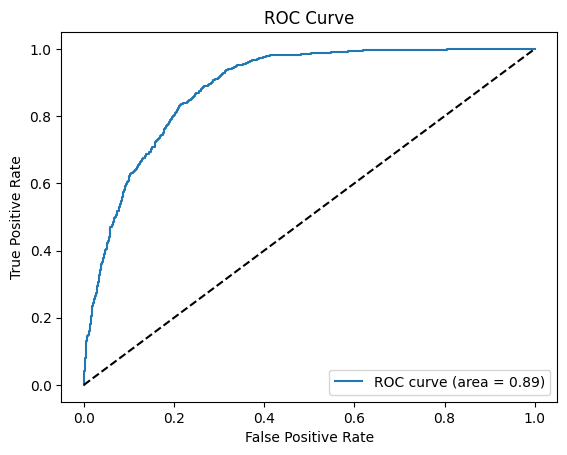

In [42]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the test dataset (where 'smoking' is not available)
test_data = pd.read_csv('test.csv')

# Feature Engineering for both train and test datasets
for dataset in [train_data, test_data]:
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']

# Prepare the train data
X = train_data.drop(columns=['id', 'smoking'])  # Dropping ID and target column from features
y = train_data['smoking']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV with stronger overfitting control
param_dist = {
    'n_estimators': [500, 1000],             # Reduce n_estimators to prevent overfitting
    'max_depth': [10, 15],                   # Limit the depth of the trees
    'min_samples_split': [20, 30],           # Further increase to prevent overfitting
    'min_samples_leaf': [4, 6],              # Increase leaf size to control overfitting
    'bootstrap': [True],                     # Use bootstrapping to control variance
    'max_features': ['sqrt'],                # Consider fewer features to prevent overfitting
    'criterion': ['gini']                    # 'gini' may generalize better
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Reduced iterations to focus on critical hyperparameters
    scoring='roc_auc',  # Optimize based on ROC AUC
    cv=10,  # Use 10-fold cross-validation for more robustness
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters from the random search
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model on the validation set
best_model = random_search.best_estimator_
y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)
report = classification_report(y_val, y_val_pred)

# Display the accuracy, ROC AUC, and classification report
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Predicting the 'smoking' status for the test dataset
test_features = test_data.drop(columns=['id'])  # Drop the 'id' column from test data
test_predictions = best_model.predict(test_features)

# Save predictions to a CSV file
test_data['smoking'] = test_predictions
test_data[['id', 'smoking']].to_csv('test_predictions_rf_tuned_final.csv', index=False)


[I 2024-10-27 19:43:18,692] A new study created in memory with name: no-name-4304086f-1578-4090-b533-a8b591c7e273


[I 2024-10-27 19:43:25,281] Trial 0 finished with value: 0.8819684198188742 and parameters: {'n_estimators': 400, 'max_depth': 30, 'min_samples_split': 22, 'min_samples_leaf': 6, 'bootstrap': True, 'max_features': 'log2'}. Best is trial 0 with value: 0.8819684198188742.
[I 2024-10-27 19:43:50,192] Trial 1 finished with value: 0.8707545514743813 and parameters: {'n_estimators': 800, 'max_depth': 5, 'min_samples_split': 30, 'min_samples_leaf': 9, 'bootstrap': True, 'max_features': None}. Best is trial 0 with value: 0.8819684198188742.
[I 2024-10-27 19:44:03,143] Trial 2 finished with value: 0.8803188626297208 and parameters: {'n_estimators': 500, 'max_depth': 10, 'min_samples_split': 20, 'min_samples_leaf': 2, 'bootstrap': False, 'max_features': 'log2'}. Best is trial 0 with value: 0.8819684198188742.
[I 2024-10-27 19:44:15,989] Trial 3 finished with value: 0.8825314611078223 and parameters: {'n_estimators': 600, 'max_depth': 20, 'min_samples_split': 2, 'min_samples_leaf': 7, 'bootstrap'

Best Hyperparameters from Optuna: {'n_estimators': 700, 'max_depth': 15, 'min_samples_split': 6, 'min_samples_leaf': 4, 'bootstrap': True, 'max_features': 'sqrt'}
Accuracy: 0.801
ROC AUC: 0.88832461051029
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1878
         1.0       0.72      0.77      0.74      1122

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.79      3000
weighted avg       0.81      0.80      0.80      3000



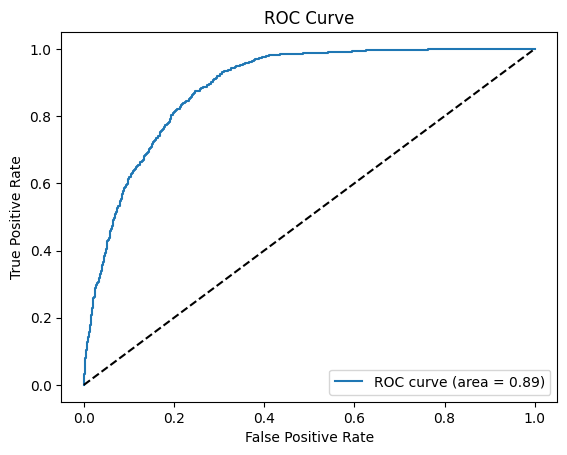

ValueError: Expected a 1D array, got an array with shape (10000, 2)

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import optuna
from optuna.samplers import TPESampler

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the test dataset (where 'smoking' is not available)
test_data = pd.read_csv('test.csv')

# Feature Engineering for both train and test datasets
for dataset in [train_data, test_data]:
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']

# Prepare the train data
X = train_data.drop(columns=['id', 'smoking'])  # Dropping ID and target column from features
y = train_data['smoking']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define objective function for Optuna with X_train and y_train as arguments
def objective(trial, X_train, y_train):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 1000, step=100)
    max_depth = trial.suggest_int('max_depth', 5, 30, step=5)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 30, step=2)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 10, step=1)
    bootstrap = trial.suggest_categorical('bootstrap', [True, False])
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2', None])
    
    # Create RandomForest model with suggested parameters
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        max_features=max_features,
        random_state=42
    )
    
    # Perform cross-validation and return the mean ROC AUC score
    score = cross_val_score(rf, X_train, y_train, cv=5, scoring='roc_auc', n_jobs=-1).mean()
    
    return score

# Optuna study setup
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=50, timeout=600)  # Pass X_train and y_train

# Best parameters from the study
best_params = study.best_params
print(f"Best Hyperparameters from Optuna: {best_params}")

# Train the final model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = best_rf.predict(X_val)
y_val_proba = best_rf.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)
report = classification_report(y_val, y_val_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(report)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Predicting the 'smoking' status for the test dataset
test_features = test_data.drop(columns=['id'])  # Drop the 'id' column from test data
test_predictions = best_rf.predict_proba(test_features)

# Save predictions to a CSV file
test_data['smoking'] = test_predictions
test_data[['id', 'smoking']].to_csv('test_predictions_optuna_rf.csv', index=False)


[I 2024-10-25 15:30:23,841] A new study created in memory with name: no-name-a259d023-a855-483a-a624-4fd94997f691
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:704: UserWarning: The distribution is specified by [5, 20] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 19].
  warnings.warn(
[I 2024-10-25 15:30:32,539] Trial 0 finished with value: 0.8836592107970456 and parameters: {'n_estimators': 300, 'max_depth': 19, 'min_samples_split': 40, 'min_samples_leaf': 8, 'bootstrap': True, 'max_features': 'sqrt'}. Best is trial 0 with value: 0.8836592107970456.
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\optuna\distributions.py:704: UserWarning: The distribution is specified by [5, 20] and step=2, but the range is not divisible by `step`. It will be replaced by [5, 19].
  warnings.warn(
[I 2024-10-25 15:30:36,008] Trial 1 finished with value: 0.8771988155693586 and parameters: {'n_est

Best Hyperparameters from Optuna: {'n_estimators': 600, 'max_depth': 17, 'min_samples_split': 15, 'min_samples_leaf': 5, 'bootstrap': True, 'max_features': 'sqrt'}
Accuracy: 0.805
ROC AUC: 0.8850321466764589
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.81      0.84      1893
         1.0       0.71      0.80      0.75      1107

    accuracy                           0.81      3000
   macro avg       0.79      0.80      0.80      3000
weighted avg       0.81      0.81      0.81      3000



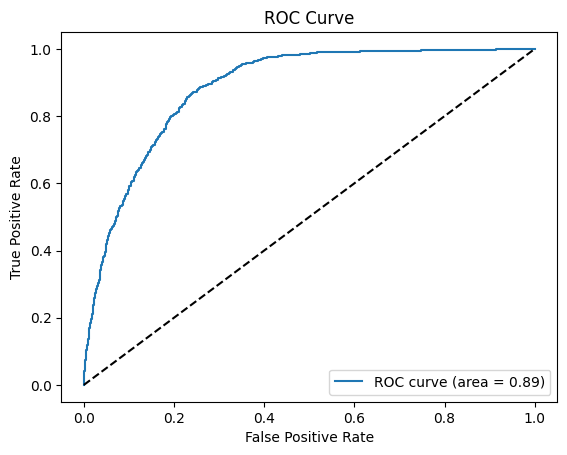

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import optuna
from optuna.samplers import TPESampler

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the test dataset (where 'smoking' is not available)
test_data = pd.read_csv('test.csv')

# Feature Engineering for both train and test datasets
for dataset in [train_data, test_data]:
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']

# Prepare the train data
X = train_data.drop(columns=['id', 'smoking'])  # Dropping ID and target column from features
y = train_data['smoking']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define objective function for Optuna with X_train and y_train as arguments
def objective(trial, X_train, y_train):
    # Define the hyperparameter search space
    n_estimators = trial.suggest_int('n_estimators', 100, 600, step=100)
    max_depth = trial.suggest_int('max_depth', 5, 20, step=2)  # Reduced max_depth
    min_samples_split = trial.suggest_int('min_samples_split', 10, 50, step=5)  # Higher values to control overfitting
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 5, 10, step=1)  # Larger leaf size to reduce complexity
    bootstrap = trial.suggest_categorical('bootstrap', [True])  # Force bootstrap
    max_features = trial.suggest_categorical('max_features', ['sqrt'])  # Only use sqrt for max features
    
    # Create RandomForest model with suggested parameters
    rf = RandomForestClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        bootstrap=bootstrap,
        max_features=max_features,
        random_state=42
    )
    
    # Perform cross-validation using StratifiedKFold to account for class imbalance
    skf = StratifiedKFold(n_splits=5)
    score = cross_val_score(rf, X_train, y_train, cv=skf, scoring='roc_auc', n_jobs=-1).mean()
    
    return score

# Optuna study setup
study = optuna.create_study(direction='maximize', sampler=TPESampler(seed=42))
study.optimize(lambda trial: objective(trial, X_train, y_train), n_trials=50, timeout=600)

# Best parameters from the study
best_params = study.best_params
print(f"Best Hyperparameters from Optuna: {best_params}")

# Train the final model with the best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Evaluate the model on the validation set
y_val_pred = best_rf.predict(X_val)
y_val_proba = best_rf.predict_proba(X_val)[:, 1]

accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)
report = classification_report(y_val, y_val_pred)

# Display the results
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(report)

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Predicting the 'smoking' status for the test dataset
test_features = test_data.drop(columns=['id'])  # Drop the 'id' column from test data
test_predictions = best_rf.predict(test_features)

# Save predictions to a CSV file
test_data['smoking'] = test_predictions
test_data[['id', 'smoking']].to_csv('test_predictions_optuna_rf.csv', index=False)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 20, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': None, 'bootstrap': True}
Accuracy: 0.8003333333333333
ROC AUC: 0.8876663648323111
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84      1878
         1.0       0.72      0.77      0.74      1122

    accuracy                           0.80      3000
   macro avg       0.79      0.80      0.79      3000
weighted avg       0.80      0.80      0.80      3000



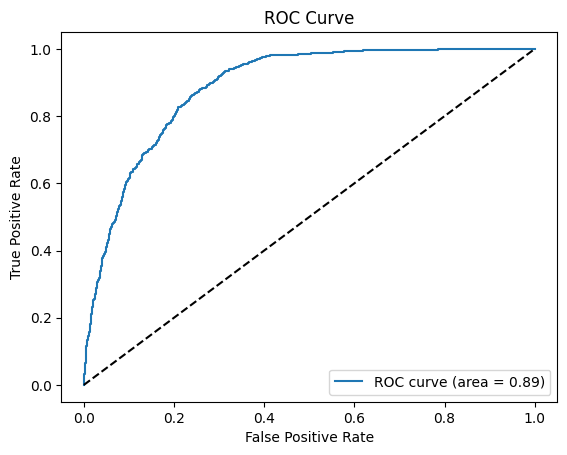

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the test dataset
test_data = pd.read_csv('test.csv')

# Feature Engineering for both train and test datasets
for dataset in [train_data, test_data]:
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']

# Prepare the train data
X = train_data.drop(columns=['id', 'smoking'])  # Dropping ID and target column from features
y = train_data['smoking']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 500, 1000],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 6],
    'bootstrap': [True, False],
    'max_features': ['sqrt', 'log2']
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # Try 20 different parameter combinations
    scoring='roc_auc',  # Optimize based on ROC AUC
    cv=5,  # 5-fold cross-validation
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters from the random search
best_params = random_search.best_params_
print(f"Best Hyperparameters: {best_params}")

# Evaluate the best model on the validation set
best_model = random_search.best_estimator_
y_val_pred = best_model.predict(X_val)
y_val_proba = best_model.predict_proba(X_val)[:, 1]

# Evaluate the model performance
accuracy = accuracy_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)
report = classification_report(y_val, y_val_pred)

# Display the accuracy, ROC AUC, and classification report
print(f"Accuracy: {accuracy}")
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(report)

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()

# Predicting the 'smoking' status for the test dataset
test_features = test_data.drop(columns=['id'])  # Drop the 'id' column from test data
test_predictions = best_model.predict(test_features)

# Save predictions to a CSV file
test_data['smoking'] = test_predictions
test_data[['id', 'smoking']].to_csv('test_predictions_rf_tuned.csv', index=False)


In [6]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(best_model, X_train, y_train, cv=10, scoring='roc_auc')
print(f"10-fold CV ROC AUC: {cv_scores.mean()}")


10-fold CV ROC AUC: 0.88398368740497


In [7]:
importances = best_model.feature_importances_
feature_names = X_train.columns
sorted_importances = sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True)
for feature, importance in sorted_importances:
    print(f"{feature}: {importance}")


hemoglobin: 0.20521036782766577
height(cm): 0.16041657837194626
Gtp: 0.1310072925108848
triglyceride: 0.07572078530986164
weight(kg): 0.05244009592297637
serum creatinine: 0.046005824407174
HDL: 0.0315165278545903
age: 0.02907165551942053
LDL: 0.028627616850503437
ALT: 0.02784558704931251
waist_height_ratio: 0.026368793626056906
waist(cm): 0.02633315879386833
Cholesterol: 0.025604249188505956
BMI: 0.020513319916788692
fasting blood sugar: 0.019811238870637383
systolic: 0.01930301020374788
AST: 0.019283862756317386
relaxation: 0.018625832234302496
eyesight(right): 0.010254647834931387
eyesight(left): 0.009719719425777169
eyesight_diff: 0.008700818054066793
dental caries: 0.007254112564145368
Urine protein: 0.0002053317935500727
hearing(right): 7.827522366830755e-05
hearing_diff: 6.985280233640113e-05
hearing(left): 1.144508696400092e-05


In [10]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import roc_auc_score, classification_report

# Load the dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Feature Engineering (e.g., BMI, waist-height ratio, eyesight difference)
for dataset in [train_data, test_data]:
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']

# Define features (dropping low-importance features)
low_importance_features = [
    'hearing(right)', 'hearing(left)', 'dental caries', 'hearing_diff',
    'Urine protein', 'eyesight(right)', 'eyesight(left)', 'relaxation'
]
X = train_data.drop(columns=['id', 'smoking'] + low_importance_features)
y = train_data['smoking']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the hyperparameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [300, 500],  # Reduce n_estimators for less overfitting
    'max_depth': [8, 10],  # Reduce depth to avoid overfitting
    'min_samples_split': [10, 20],  # Increase to control overfitting
    'min_samples_leaf': [4, 6],  # More leaf samples to prevent overfitting
    'bootstrap': [True],
    'max_features': ['sqrt'],
    'criterion': ['gini']
}

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV setup
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=20,  # 20 iterations
    scoring='roc_auc',
    cv=5,  # 5-fold cross-validation to reduce variance
    verbose=2,
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Best parameters from the random search
best_model = random_search.best_estimator_

# Bagging to help with overfitting
bagging_model = BaggingClassifier(estimator=best_model, n_estimators=10, random_state=42)
bagging_model.fit(X_train, y_train)

# Evaluate the best model on the validation set
y_val_pred = bagging_model.predict(X_val)
y_val_proba = bagging_model.predict_proba(X_val)[:, 1]

# Evaluate the model performance
roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"ROC AUC: {roc_auc}")
print("Classification Report:")
print(classification_report(y_val, y_val_pred))

# Predicting the 'smoking' status for the test dataset
X_test = test_data.drop(columns=['id'] + low_importance_features)  # Drop the 'id' column and low importance features
test_predictions = bagging_model.predict(X_test)

# Save predictions to a CSV file
test_data['smoking'] = test_predictions
test_data[['id', 'smoking']].to_csv('test_predictions_bagging_rf.csv', index=False)


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 16 is smaller than n_iter=20. Running 16 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Fitting 5 folds for each of 16 candidates, totalling 80 fits
ROC AUC: 0.8832437321912985
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.80      0.83      1878
         1.0       0.70      0.79      0.74      1122

    accuracy                           0.80      3000
   macro avg       0.78      0.79      0.79      3000
weighted avg       0.80      0.80      0.80      3000



In [11]:
from sklearn.feature_selection import SelectFromModel

# Use SelectFromModel to automatically select important features based on the Random Forest
selector = SelectFromModel(best_model, threshold='median', prefit=True)
X_train_selected = selector.transform(X_train)
X_val_selected = selector.transform(X_val)

# Fit the BaggingClassifier with the selected features
bagging_model.fit(X_train_selected, y_train)

# Evaluate the selected feature model on the validation set
y_val_pred = bagging_model.predict(X_val_selected)
y_val_proba = bagging_model.predict_proba(X_val_selected)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"ROC AUC (with feature selection): {roc_auc}")


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


ROC AUC (with feature selection): 0.8784722815450123


In [12]:
# Check correlation and drop highly correlated features
corr_matrix = X_train.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Drop features with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
X_train_reduced = X_train.drop(columns=to_drop)
X_val_reduced = X_val.drop(columns=to_drop)

# Re-fit the model with reduced features
bagging_model.fit(X_train_reduced, y_train)

# Evaluate again
y_val_pred = bagging_model.predict(X_val_reduced)
y_val_proba = bagging_model.predict_proba(X_val_reduced)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"ROC AUC (with reduced features): {roc_auc}")


ROC AUC (with reduced features): 0.8832437321912985


In [13]:
from sklearn.ensemble import ExtraTreesClassifier

# Try Extra Trees with Bagging
extra_trees = ExtraTreesClassifier(n_estimators=500, random_state=42, max_depth=10, min_samples_split=20, min_samples_leaf=4)
bagging_model = BaggingClassifier(estimator=extra_trees, n_estimators=10, random_state=42)

# Fit and evaluate
bagging_model.fit(X_train, y_train)
y_val_pred = bagging_model.predict(X_val)
y_val_proba = bagging_model.predict_proba(X_val)[:, 1]

roc_auc = roc_auc_score(y_val, y_val_proba)
print(f"ROC AUC (with Extra Trees): {roc_auc}")


ROC AUC (with Extra Trees): 0.8680485554663341


In [16]:
# Train va test ma'lumotlaridagi mavjud ustunlarni aniqlaymiz
train_columns = set(X_train_reduced.columns)
test_columns = set(X_test_reduced.columns)

# Qaysi ustunlar farq qilayotganini ko'ramiz
missing_in_test = train_columns - test_columns
missing_in_train = test_columns - train_columns

print(f"Ustunlar train to'plamida, lekin test to'plamida yo'q: {missing_in_test}")
print(f"Ustunlar test to'plamida, lekin train to'plamida yo'q: {missing_in_train}")


Ustunlar train to'plamida, lekin test to'plamida yo'q: set()
Ustunlar test to'plamida, lekin train to'plamida yo'q: {'smoking', 'relaxation', 'Urine protein', 'eyesight(left)', 'eyesight(right)', 'dental caries', 'hearing_diff', 'hearing(right)', 'hearing(left)'}


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Load the training dataset
train_data = pd.read_csv('train.csv')

# Load the test dataset
test_data = pd.read_csv('test.csv')

# Feature Engineering for both train and test datasets
for dataset in [train_data, test_data]:
    dataset['BMI'] = dataset['weight(kg)'] / (dataset['height(cm)'] / 100) ** 2
    dataset['waist_height_ratio'] = dataset['waist(cm)'] / dataset['height(cm)']
    dataset['eyesight_diff'] = dataset['eyesight(left)'] - dataset['eyesight(right)']
    dataset['hearing_diff'] = dataset['hearing(left)'] - dataset['hearing(right)']


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
350 fits failed out of a total of 1000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
232 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py

Accuracy: 0.7973
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.81      0.83      1878
         1.0       0.71      0.77      0.74      1122

    accuracy                           0.80      3000
   macro avg       0.78      0.79      0.79      3000
weighted avg       0.80      0.80      0.80      3000

ROC-AUC Score: 0.8858


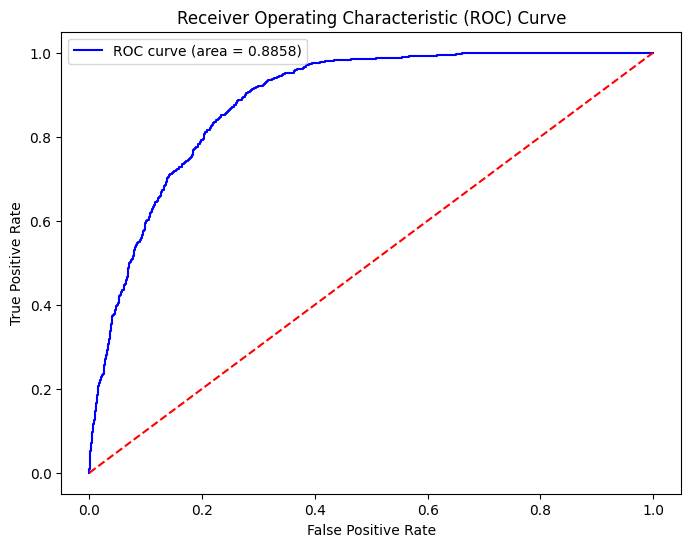

In [39]:
# Maqsadli ustun va mustaqil o'zgaruvchilarni ajratish
X = train_data.drop(columns=['smoking'])
y = train_data['smoking']

# Trening va test ma'lumotlarini bo'lish
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest modelini yaratish
rf_model = RandomForestClassifier(random_state=42)

# Hyperparametrlarni tanlash uchun qidiruv parametrlari
param_distributions = {
    'n_estimators': [20, 50, 150, 200, 300, 400],       # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],           # Number of features to consider at each split
    'max_depth': [5, 10, 20, 30, 50],                   # Maximum depth of the tree
    'min_samples_split': [5, 10, 20, 40, 50],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [5, 10, 20, 30],                # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                          # Whether to bootstrap samples when building trees
}

# RandomizedSearchCV yordamida parametrlarni tanlash
rf_random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions, 
                                      n_iter=200, cv=5, random_state=42, n_jobs=-1)

# Modelni o'rgatish
rf_random_search.fit(X_train, y_train)

# Eng yaxshi modelni tanlash
best_rf_model = rf_random_search.best_estimator_

# Validation to'plamida bashorat qilish
y_pred = best_rf_model.predict(X_valid)

# Modelni baholash
accuracy = accuracy_score(y_valid, y_pred)
print(f'Accuracy: {accuracy:.4f}')

# Klassifikatsiya hisobotini chiqarish
print("Classification Report:")
print(classification_report(y_valid, y_pred))

# ROC-AUC ko'rsatkichi
y_pred_proba = best_rf_model.predict_proba(X_valid)[:, 1]
roc_auc = roc_auc_score(y_valid, y_pred_proba)
print(f'ROC-AUC Score: {roc_auc:.4f}')

# ROC Curve diagrammasini chizish
fpr, tpr, thresholds = roc_curve(y_valid, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


In [40]:
# O'rganish uchun ishlatilgan barcha ustunlar nomini olish va ro'yxatga aylantirish
train_columns = list(X_train.columns)

# Test to'plamidan faqat o'rgatilgan ustunlarni tanlash
test_data_prepared = test_data[train_columns]  # Faqat modelda ishlatilgan ustunlarni tanlaymiz

# Test ma'lumotlar to'plamidagi smoking qiymatlarini bashorat qilish
test_predictions = best_rf_model.predict(test_data_prepared)

# Test natijalarini yangi DataFrame ga yig'ish
submission = pd.DataFrame({
    'id': test_data['id'],   # test datasidagi ID ustuni
    'smoking': test_predictions   # bashorat qilingan smoking qiymatlari
})

# Yangi CSV faylga natijalarni saqlash
submission.to_csv('smoking_predictions.csv', index=False)

print("Bashoratlar 'smoking_predictions.csv' fayliga muvaffaqiyatli saqlandi.")


Bashoratlar 'smoking_predictions.csv' fayliga muvaffaqiyatli saqlandi.


In [28]:
test_data

,id,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,...,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,BMI,waist_height_ratio,eyesight_diff,hearing_diff
0,15000,40.0,175.0,70.0,84.0,1.5,1.5,1.0,1.0,120.0,...,1.0,1.0,15.0,9.0,25.0,0.0,22.857143,0.480000,0.0,0.0
1,15001,45.0,155.0,55.0,72.4,0.6,0.5,1.0,1.0,102.0,...,1.0,0.8,14.0,10.0,13.0,0.0,22.892820,0.467097,0.1,0.0
2,15002,40.0,160.0,55.0,76.0,1.2,1.2,1.0,1.0,115.0,...,1.0,0.8,14.0,10.0,11.0,0.0,21.484375,0.475000,0.0,0.0
3,15003,45.0,150.0,50.0,74.4,1.0,1.0,1.0,1.0,96.0,...,1.0,0.7,23.0,15.0,18.0,0.0,22.222222,0.496000,0.0,0.0
4,15004,35.0,185.0,80.0,90.0,0.8,1.0,1.0,1.0,113.0,...,1.0,0.9,16.0,26.0,20.0,0.0,23.374726,0.486486,-0.2,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,24995,25.0,170.0,70.0,85.0,0.6,0.7,1.0,1.0,106.0,...,1.0,1.0,23.0,16.0,22.0,0.0,24.221453,0.500000,-0.1,0.0
9996,24996,55.0,175.0,70.0,85.0,0.7,1.2,1.0,1.0,138.0,...,1.0,0.9,13.0,8.0,18.0,0.0,22.857143,0.485714,-0.5,0.0
9997,24997,45.0,155.0,50.0,74.6,0.5,0.4,1.0,1.0,106.0,...,1.0,0.9,20.0,16.0,26.0,0.0,20.811655,0.481290,0.1,0.0
9998,24998,45.0,160.0,55.0,74.0,1.0,1.2,1.0,1.0,107.0,...,1.0,0.8,17.0,9.0,11.0,0.0,21.484375,0.462500,-0.2,0.0


In [35]:
best_rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [37]:
param_distributions = {
    'n_estimators': [20, 50, 150, 200, 300, 400],       # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],           # Number of features to consider at each split
    'max_depth': [5, 10, 20, 30, 50],                   # Maximum depth of the tree
    'min_samples_split': [5, 10, 20, 40, 50],           # Minimum number of samples required to split an internal node
    'min_samples_leaf': [5, 10, 20, 30],                # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                          # Whether to bootstrap samples when building trees
}

In [38]:
rf = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_distributions,
    n_iter=200,            # Number of parameter settings to try (iterations)
    cv=5,                  # Output verbosity
    random_state=42,     # For reproducibility
    n_jobs=-1              # Use all available cores
)

random_search.fit(X, y)

KeyboardInterrupt: 